![Imgur](https://i.imgur.com/h4PPC71.png)
#**19-modul. Unsupervised learning. Clustering**
# 19.8. Modul boʻyicha yakuniy amaliy vazifa. Mijozlarni xarajat turlariga qarab segmentlash

**Ushbu vazifa orqali siz:**

✔️ klasterlash;

✔️ maʼlumotlarni normallashtirish;

✔️ klaster tahlili;

✔️ vizualizatsiya kabi real data sayns loyihalari uchun zarur texnik ko‘nikmalarga ega bo‘lasiz.

## **Dataset: Wholesale Customers Data**  
- **Manba:** [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/wholesale+customers)  
- **Hajmi:** **22 KB**
- **Format:** CSV  
- **Tavsif:** bu dataset **ulgurji savdo mijozlarini** xarajatlar bo‘yicha klasterlash uchun ishlatiladi.  
  U quyidagi xarajat kategoriyalarini o‘z ichiga oladi:  
  - **channel** (mijoz turi: 1 – HoReCa (mehmonxona, restoran, kafelar) yoki 2 – chakana savdo)  
  - **region** (hudud: 1 – Lisbon, 2 – Oporto, 3 – boshqa)  
  - **fresh** (yangi mahsulotlarga sarf qilingan summa)  
  - **milk** (sut mahsulotlariga sarf qilingan summa)  
  - **grocery** (oziq-ovqat mahsulotlariga sarf qilingan summa)  
  - **frozen** (muzlatilgan mahsulotlarga sarf qilingan summa)  
  - **Detergents_Paper** (kimyoviy tozalash va qog‘oz mahsulotlari)  
  - **delicassen** (delikates mahsulotlar)  

---

### **Vazifa: mijozlarni xarajat turlariga qarab segmentlash**  
Maqsad – **mijozlarni xarajat qiladigan mahsulotlar bo‘yicha klasterlash va marketologlarga tavsiyalar berish**  

---

### **Klasterlash bosqichlari**  
1) **Maʼlumotlarni tayyorlash**  
   - `Channel` va `Region` ustunlarini olib tashlang yoki kodlang.  
   - Har bir xarajat ustunini **normalizatsiya qiling**.  

2) **K-means klasterlashni amalga oshirish**  
   - K-means yordamida mijozlarni **xarajat qilish odatlari** bo‘yicha segmentlarga ajrating.  

3) **Natijalarni vizualizatsiya qilish**  
   - **Pairplot yoki scatter plot** yordamida klasterlarni ko‘rsating.  
   - Har bir segmentning xarajatlar bo‘yicha o‘rtacha qiymatini diagrammada aks ettiring.

---

###**ESLATMA**: *Ushbu amaliy vazifada siz oʻtmagan mavzulardan ham savollar va vazifalar boʻlishi mumkin! Bu savollarni mustaqil oʻrganishingiz kerak boʻladi. Bunday vazifalar mustaqil izlanish koʻnikmangizni oshirish uchun tayyorlandi!*

In [133]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline

from sklearn.preprocessing import StandardScaler # for normalization
import seaborn as sns

In [134]:
df = pd.read_csv("https://raw.githubusercontent.com/alishermutalov/praktikum-datasets/refs/heads/praktikum/Wholesale_customers_data.csv")
df.head()


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


## Ma'lumotlarni o'rganamiz, tahrirlaymiz va tayyorlaymiz

In [135]:
df.shape

(440, 8)

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [137]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [138]:
# df dagi mavjud bo'lmagan qiymatlar soni
print(f"mavjud bo'lmagan qiymatlar soni: {df.isnull().sum().sum()}")

# mavjud bo'lmagan qatorlar soni
missing_rovs = df[df.isnull().any(axis=1)].shape[0]
print(f"Mavjud bo'lmagan qatorlar soni: {missing_rovs}")

# qatorlar nisbati
print(f"Mavjud bo'lmagan qatorlar %: {np.round(missing_rovs/len(df)*100)}%")

mavjud bo'lmagan qiymatlar soni: 0
Mavjud bo'lmagan qatorlar soni: 0
Mavjud bo'lmagan qatorlar %: 0.0%


In [139]:
corr_matrix = df.corr().abs()
corr_matrix.style.background_gradient(cmap='coolwarm')

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Channel,1.000000,0.062028,0.169172,0.460720,0.608792,0.202046,0.636026,0.056011
Region,0.062028,1.000000,0.055287,0.032288,0.007696,0.021044,0.001483,0.045212
Fresh,0.169172,0.055287,1.000000,0.100510,0.011854,0.345881,0.101953,0.244690
Milk,0.460720,0.032288,0.100510,1.000000,0.728335,0.123994,0.661816,0.406368
Grocery,0.608792,0.007696,0.011854,0.728335,1.000000,0.040193,0.924641,0.205497
Frozen,0.202046,0.021044,0.345881,0.123994,0.040193,1.000000,0.131525,0.390947
Detergents_Paper,0.636026,0.001483,0.101953,0.661816,0.924641,0.131525,1.000000,0.069291
Delicassen,0.056011,0.045212,0.244690,0.406368,0.205497,0.390947,0.069291,1.000000


## Yuqoridagilardan xulosa qilishimiz mumkin NaN qiymatlar mavjud emas va correlyatsiyasi ham nisbatan yaxshi hisoblanadi

## `Region` va `Channel` ustunlarini tashlab yuboramiz

In [140]:
df = df.drop(["Region", "Channel"], axis=1)
df.sample(5)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
62,7823,6245,6544,4154,4074,964
363,4627,997,4438,191,1335,314
365,4692,6128,8025,1619,4515,3105
344,3043,1172,1763,2234,217,379
183,36847,43950,20170,36534,239,47943


## Normalizasiya

In [141]:
# from sklearn.preprocessing import StandardScaler

X = df.values[:,:] # Barcha ustunlarni normalizatsiya qilamiz
X = np.nan_to_num(X)
norm_data = StandardScaler().fit_transform(X)
norm_data

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

##**Model**

Bu dataset ulgurji savdo mijozlarini xarajatlar bo‘yicha klasterlash uchun ishlatiladi.

`Vazifa:` mijozlarni xarajat turlariga qarab segmentlash

`Maqsad` – mijozlarni xarajat qiladigan mahsulotlar bo‘yicha klasterlash va marketologlarga tavsiyalar berish

In [142]:
k = 3
k_means = KMeans(n_clusters = k)
k_means.fit(norm_data)
print(k_means.labels_)

# Biz bu mijozlarni 3 ta clasterga ajratamiz

[1 1 1 2 2 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 0 2 1 1 1 1 2 1 1 2 2 1 1 2
 1 1 2 2 2 1 1 1 1 1 0 1 1 1 1 2 1 2 1 0 1 1 1 1 0 1 1 1 0 1 1 1 1 2 2 1 2
 1 2 1 1 1 1 1 1 1 2 1 0 0 2 2 2 1 2 0 2 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1
 1 2 2 2 1 1 1 2 1 2 1 1 1 2 2 2 1 1 2 1 1 1 1 1 1 1 1 1 1 2 2 2 2 1 1 1 1
 1 2 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 0 1 0 1
 1 1 1 1 1 2 1 1 1 1 2 2 1 1 1 1 1 2 1 1 1 1 1 1 1 2 0 1 1 1 1 1 2 1 1 1 1
 1 1 1 1 1 1 1 1 2 1 2 1 2 1 1 2 1 2 2 2 2 1 1 1 1 1 1 1 1 0 1 2 1 2 1 1 2
 2 1 1 2 1 1 1 1 2 1 2 1 1 1 2 1 1 2 2 2 1 1 1 2 2 2 2 1 2 1 2 1 1 1 1 2 1
 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 2 1 2 0 1 1 2 1 1 1 2
 0 2 2 1 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 2 1 2 1 1 1 2 1 1 1 1 1 1 1 2 1
 2 2 1 1 1 1 1 2 1 1 2 2 2 1 1 1 1 2 1 1 1 1 1 2 1 1 1 2 2 1 1 2 2 2 2 1 2
 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 2 1 1 2 1 2 1 1 1 2 2 1 1 2 2 1 1 1]


In [143]:
k_means.cluster_centers_

array([[ 1.12931914,  3.80515119,  3.37123923,  1.57377916,  3.28774148,
         2.19858788],
       [-0.43200516, -0.05766032, -0.01692425, -0.28350896,  0.01543807,
        -0.13277968],
       [ 1.05670041, -0.31172069, -0.37079697,  0.59031324, -0.4500929 ,
         0.09539654]])

In [144]:
print(np.round(k_means.cluster_centers_))

[[ 1.  4.  3.  2.  3.  2.]
 [-0. -0. -0. -0.  0. -0.]
 [ 1. -0. -0.  1. -0.  0.]]


## Yuqorida mijozlarni klasterlarga ajratdik endi pastda ularni `cluster` degan ustun bilan df ga qo'shamiz

In [145]:
df['cluster'] = k_means.labels_
df.head(10)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
0,12669,9656,7561,214,2674,1338,1
1,7057,9810,9568,1762,3293,1776,1
2,6353,8808,7684,2405,3516,7844,1
3,13265,1196,4221,6404,507,1788,2
4,22615,5410,7198,3915,1777,5185,2
5,9413,8259,5126,666,1795,1451,1
6,12126,3199,6975,480,3140,545,1
7,7579,4956,9426,1669,3321,2566,1
8,5963,3648,6192,425,1716,750,1
9,6006,11093,18881,1159,7425,2098,1


fresh (yangi mahsulotlarga sarf qilingan summa)

milk (sut mahsulotlariga sarf qilingan summa)

grocery (oziq-ovqat mahsulotlariga sarf qilingan summa)

frozen (muzlatilgan mahsulotlarga sarf qilingan summa)

Detergents_Paper (kimyoviy tozalash va qog‘oz mahsulotlari)

delicassen (delikates mahsulotlar)

Har bir klaster sentrodini topish orqali kalsterlar haqida ma'lumot olishimiz mumkin. Buning uchun esa `groupby` va `mean` funksiyalaridan foydalanamiz

In [146]:
df.groupby('cluster').mean()

# Bu kod df ma'lumotlar to'plamini 'cluster' ustuni bo'yicha guruhlaydi va keyin har bir klaster
# uchun barcha sonli ustunlarning o'rtacha qiymatini hisoblaydi. Bu har bir klasterdagi
# mijozlarning o'rtacha xususiyatlarini tushunishga yordam beradi.

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
cluster,,,,,,
0,26266.928571,33847.785714,39952.285714,10703.428571,18539.142857,7718.071429
1,6542.798722,5371.194888,7790.626198,1697.153355,2955.015974,1150.843450
2,25349.539823,3498.265487,4431.539823,5934.451327,737.955752,1793.592920


Klaster 0 (Fresh-ga yo'naltirilgan): Asosan yangi mahsulotlarga (Fresh) ko'p pul sarflaydi. Qolgan mahsulot turlariga o'rtacha yoki kamroq xarajat qiladi.

Klaster 1 (Oziq-ovqat va Maishiy kimyo): Sut mahsulotlari (Milk), oziq-ovqat (Grocery) va maishiy kimyo (Detergents_Paper) mahsulotlariga juda katta miqdorda xarajat qiladi. Bu turdagi mijozlar ko'pincha chakana savdo nuqtalari yoki katta oilalar bo'lishi mumkin.

Klaster 2 (Yuqori darajadagi Delikates): Yangi, sut, muzlatilgan va ayniqsa delikates mahsulotlariga (Delicassen) juda yuqori xarajatlar qiladi. Kimyoviy tozalash mahsulotlariga esa juda kam pul sarflaydi. Bu restoranlar yoki yuqori sinf xizmat ko'rsatish sohalari mijozlari bo'lishi mumkin.

## **Vizualizatsiya**

##  Klasterlar bo'yicha Pairplot

Klasterlarni xarajat turlari bo'yicha vizualizatsiya qilish uchun Pairplot chizamiz. Bu klasterlarning har bir xarajat ustuni bo'yicha qanday tarqalganligini ko'rsatadi.


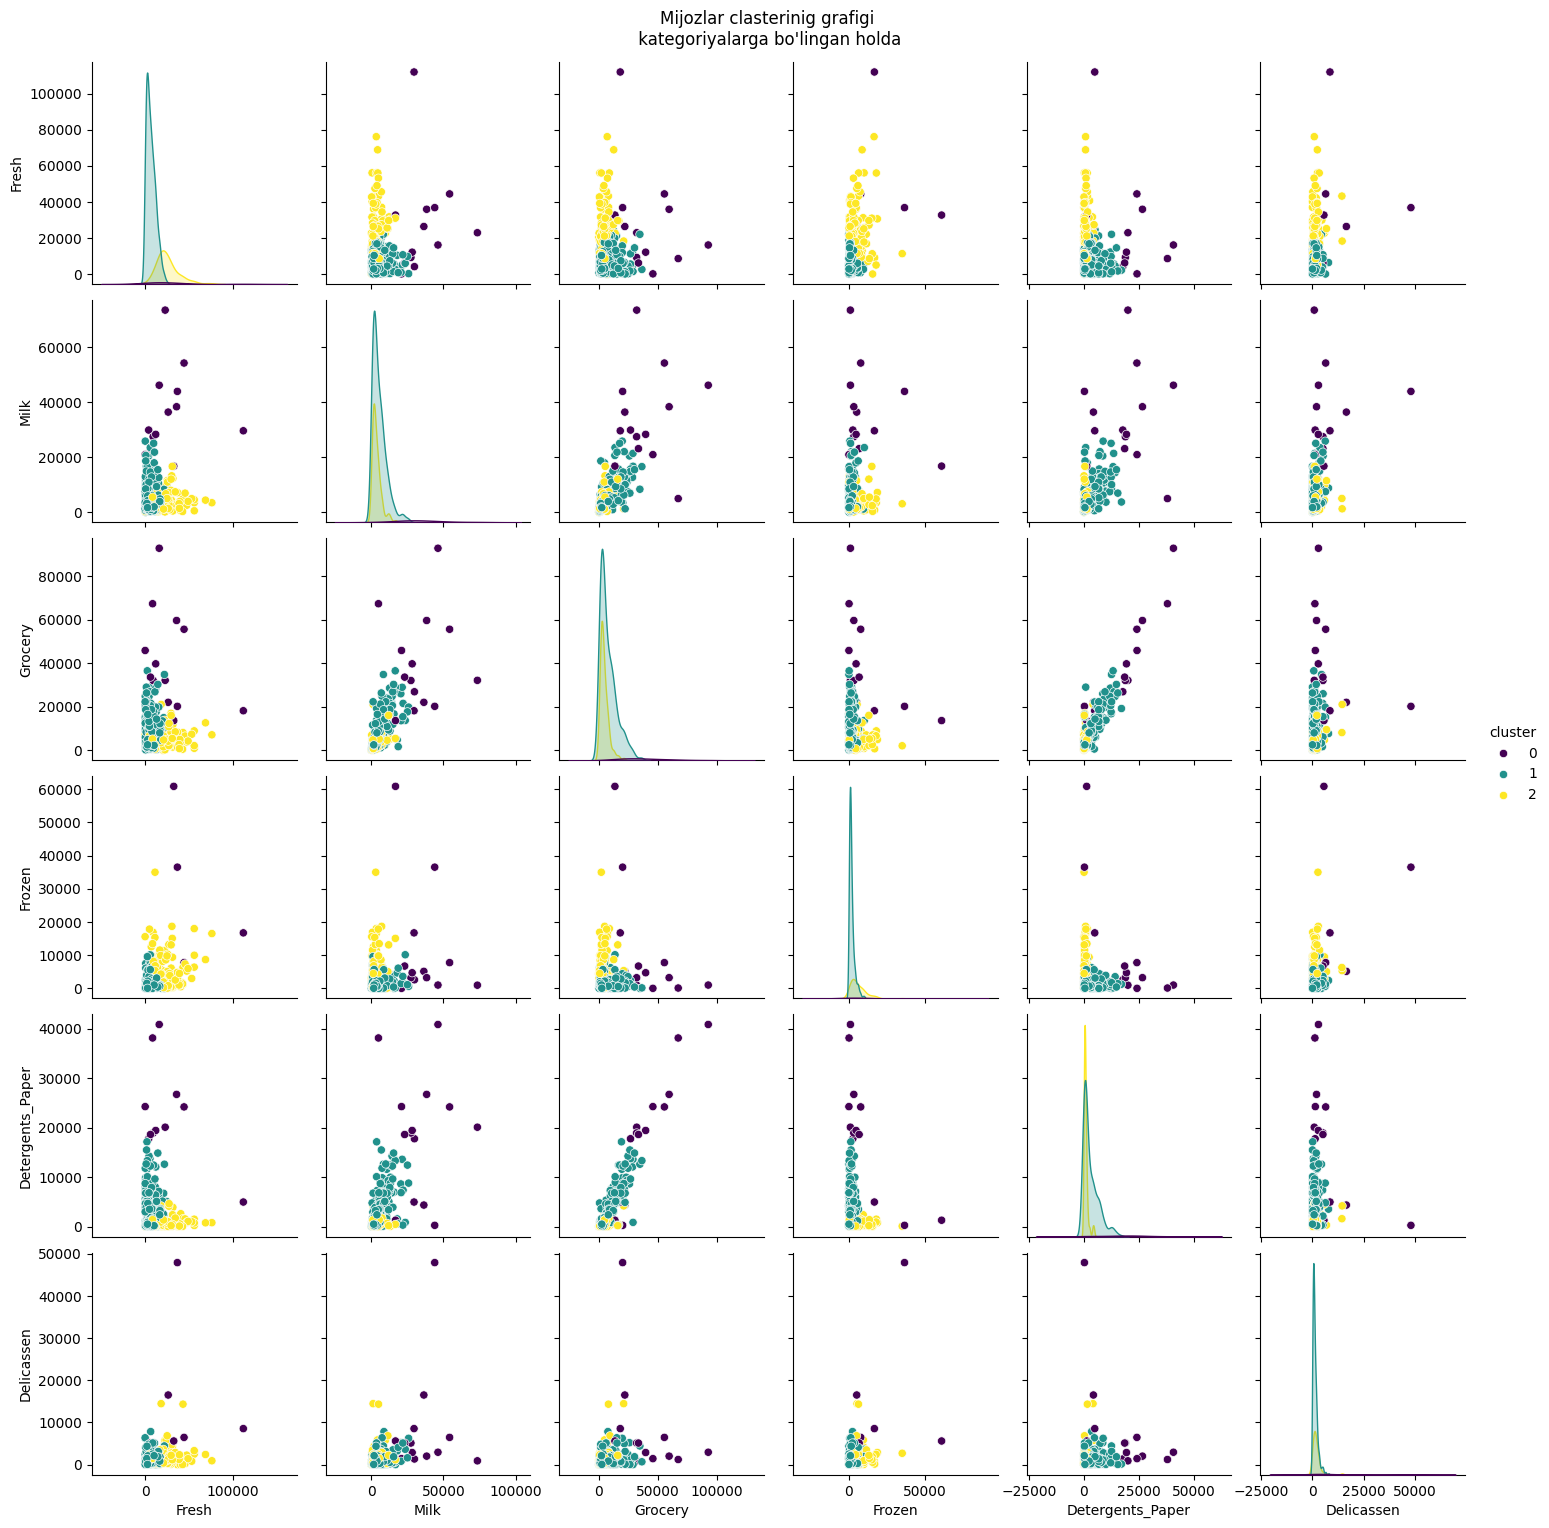

In [147]:
# import seaborn as sns

sns.pairplot(df, hue='cluster', palette='viridis')
# df ma'lumotlar to'plamidagi har bir ustun juftligi o'rtasidagi munosabatni ko'rsatadigan
# grafiklar matritsasini yaratadi. hue='cluster' yordamida nuqtalar 'cluster' ustunidagi
# qiymatlarga qarab ranglanadi, palette='viridis' esa ranglar sxemasini belgilaydi.
plt.suptitle("Mijozlar clasterinig grafigi\n kategoriyalarga bo'lingan holda", y=1.02)
#  y=1.02 sarlavhaning vertikal joylashuvini boshqaradi.
plt.show()

# viridis ranglar palitrasida:
# To'q binafsha/ko'k rang birinchi klasterga (Klaster 0) to'g'ri keladi.
# Yashil rang ikkinchi klasterga (Klaster 1) to'g'ri keladi.
# Sariq rang uchinchi klasterga (Klaster 2) to'g'ri keladi.

## Har bir klaster bo'yicha o'rtacha xarajatlarni bar chart yordamida vizualizatsiya qilamiz. Bu turli segmentlar o'rtasidagi xarajat farqlarini aniq ko'rsatadi.

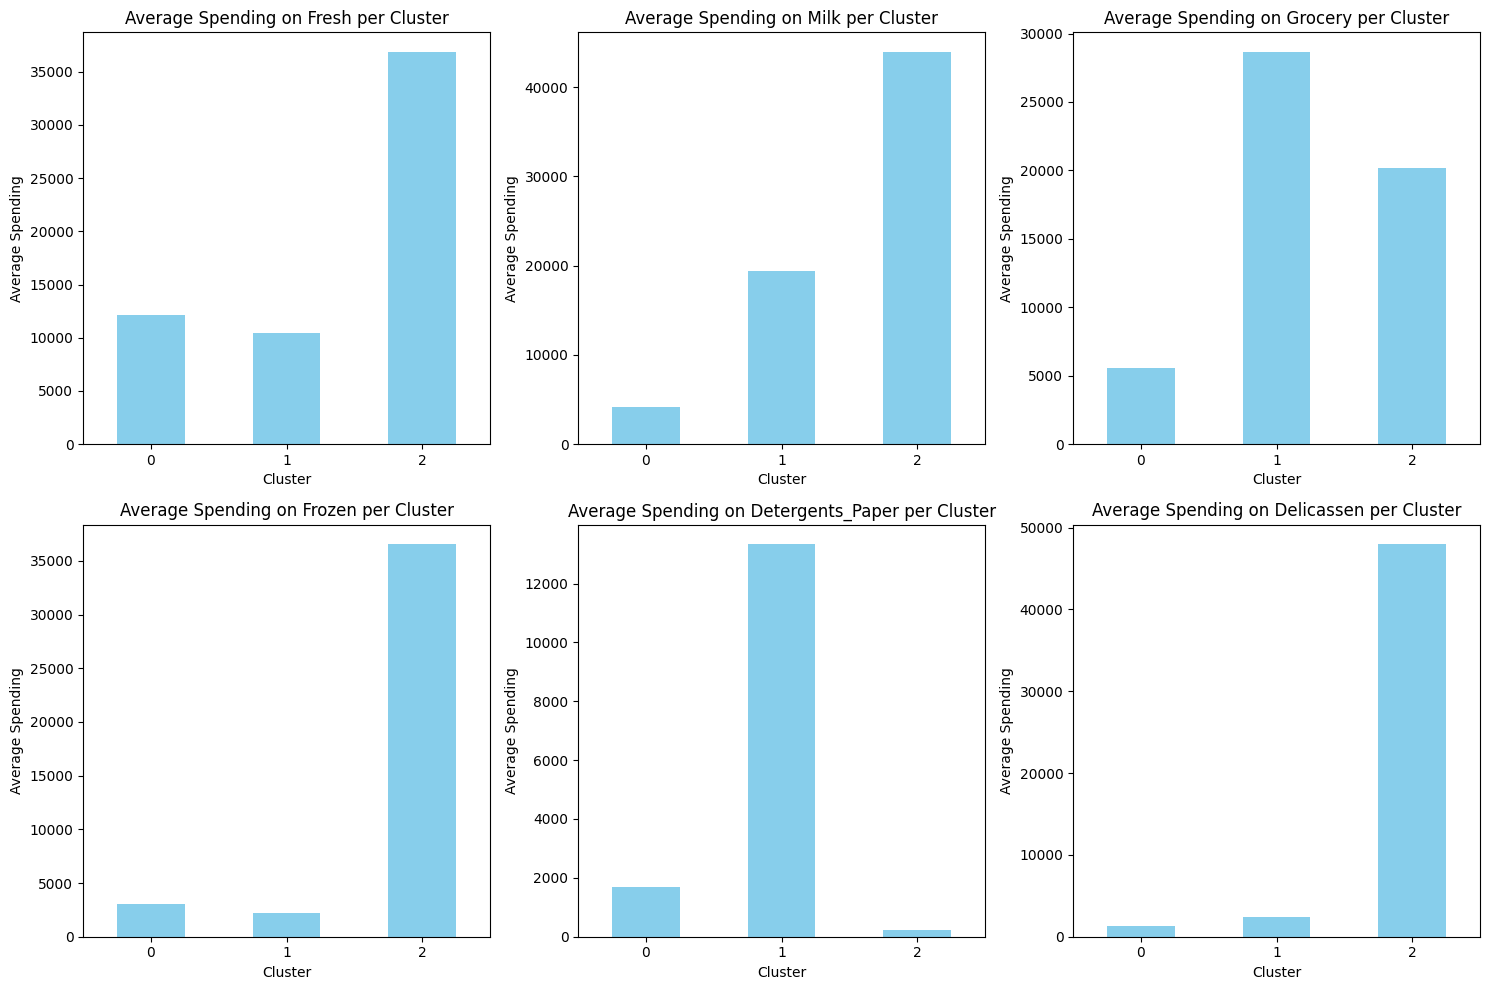

In [148]:
spending_categories = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

plt.figure(figsize=(15, 10))
for i, category in enumerate(spending_categories):
    plt.subplot(2, 3, i + 1)
    avg_spending_per_cluster[category].plot(kind='bar', color='skyblue')
    plt.title(f'Average Spending on {category} per Cluster')
    plt.xlabel('Cluster')
    plt.ylabel('Average Spending')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

## **Umumiy xulosa**

Klaster 0 (Fresh-ga yo'naltirilgan): Yangi mahsulotlarga ko'p xarajat qiluvchi mijozlar. Ularga yangi mahsulotlar uchun maxsus takliflar va sifat kafolatlari orqali yondashish kerak.

Klaster 1 (Oziq-ovqat va Maishiy kimyo): Sut, oziq-ovqat va tozalash vositalariga juda katta miqdorda pul sarflaydigan mijozlar. Ular uchun ulgurji chegirmalar, paketli takliflar va doimiy xaridlar uchun bonus dasturlari samarali bo'ladi.

Klaster 2 (Yuqori darajadagi Delikates): Delikates va muzlatilgan mahsulotlarga juda yuqori xarajat qiluvchi, ammo umumiy soni kamroq bo'lgan mijozlar. Ularga yuqori sifatli, noyob mahsulotlar va shaxsiylashtirilgan xizmatlar taklif qilish orqali xizmat ko'rsatish mumkin.